# Image classifier

In [3]:
!pip install torch
!pip install torchvision

In [48]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV,cross_validate,train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB,CategoricalNB
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import matplotlib.pyplot as plt

## Dataset

In [3]:
transformer = transforms.Compose([
                               torchvision.transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x)),
                             ])

In [4]:
train_set=torchvision.datasets.FashionMNIST('./files/fashion-mnist/', train=True, download=True,
                             transform=transformer)

test_set=torchvision.datasets.FashionMNIST('./files/fashion-mnist/', train=False, download=True,
                             transform=transformer)

batch_size_train= len(train_set)//5
batch_size_test=len(test_set)

26422272it [00:05, 4669090.01it/s]                                                                                     


Extracting ./files/fashion-mnist/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./files/fashion-mnist/FashionMNIST\raw



29696it [00:00, 912009.52it/s]                                                                                         


Extracting ./files/fashion-mnist/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./files/fashion-mnist/FashionMNIST\raw



4422656it [00:00, 5766189.35it/s]                                                                                      


Extracting ./files/fashion-mnist/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./files/fashion-mnist/FashionMNIST\raw



6144it [00:00, 6097918.55it/s]                                                                                         

Extracting ./files/fashion-mnist/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./files/fashion-mnist/FashionMNIST\raw



In [5]:
train_loader = torch.utils.data.DataLoader(
  train_set,
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  test_set,
  batch_size=batch_size_test, shuffle=True)

In [6]:
train_enumerated = enumerate(train_loader)
batch_idx, (train_x, train_y) = next(train_enumerated)

test_enumerated = enumerate(test_loader)
batch_idx, (test_x, test_y) = next(test_enumerated)

In [7]:
train_x.shape

torch.Size([12000, 784])

In [8]:
train_x[1].shape

torch.Size([784])

## Models
### Comparing the models

We will make a cross validation for the four models and compare them.

In [9]:
model_lbls = [
              'gnb', 
              'mnb', 
              'cnb', 
              'bnb', 
            ]

models = {
    'gnb': {'name': 'Gaussian Naive Bayes       ',
           'estimator': GaussianNB(), 
           'param': [{}],
          },
    'mnb': {'name': 'Multinomial Naive Bayes       ',
           'estimator': MultinomialNB(),
           'param': [{}]
          },
    'cnb': {'name': 'ComplementNB   ',
           'estimator': ComplementNB(),
           'param': [{}],
          },
    'bnb':{'name': 'BernoulliNB      ',
           'estimator': BernoulliNB(), 
           'param': [{}]
          },
}

scores = ['precision', 'recall','f1']

In [10]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    true_y, pred_y = test_y, model.predict(test_x)
    print(classification_report(true_y, pred_y))
    print()

In [11]:

def evaluate_models(models):
    results_short = {}
    for score in scores:
        print('='*40)
        print("# Tuning hyper-parameters for %s" % score)
        print()

        for m in model_lbls:
            print('-'*40)
            print("Trying model {}".format(models[m]['name']))
            clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                               scoring='%s_macro' % score, 
                               return_train_score = False,
                               n_jobs = 2, 
                               )
            clf.fit(train_x, train_y)
            print_results(clf)
            results_short[m] = clf.best_score_
        print("Summary of results for {}".format(score))
        print("Estimator")
        for m in results_short.keys():
            print("{}\t - score: {:4.2}%".format(models[m]['name'], results_short[m]))

In [12]:
evaluate_models(models)

# Tuning hyper-parameters for precision

----------------------------------------
Trying model Gaussian Naive Bayes       
Best parameters set found on train set:

{}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.83      0.50      0.63      1000
           1       0.99      0.83      0.90      1000
           2       0.57      0.27      0.36      1000
           3       0.43      0.95      0.60      1000
           4       0.37      0.71      0.48      1000
           5       0.92      0.27      0.41      1000
           6       0.34      0.04      0.07      1000
           7       0.50      0.99      0.66      1000
           8       0.82      0.70      0.76      1000
           9       0.91      0.65      0.76      1000

    accuracy                           0.59     10000
   

Best parameters set found on train set:

{}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.83      0.50      0.63      1000
           1       0.99      0.83      0.90      1000
           2       0.57      0.27      0.36      1000
           3       0.43      0.95      0.60      1000
           4       0.37      0.71      0.48      1000
           5       0.92      0.27      0.41      1000
           6       0.34      0.04      0.07      1000
           7       0.50      0.99      0.66      1000
           8       0.82      0.70      0.76      1000
           9       0.91      0.65      0.76      1000

    accuracy                           0.59     10000
   macro avg       0.67      0.59      0.56     10000
weighted avg       0.67      0.59      0.56     10000


----------------

As we can see the Multinomial Naive Bayes and the Bernoulli Naive Bayes outperform the other two classifiers.
That's why we will take a closer look at these two and try to pick the best parameters.

In [13]:
models = {
    'mnb': {'name': 'Multinomial Naive Bayes       ',
           'estimator': MultinomialNB(),
           'param': [{'alpha': [0,0.1,0.3,0.5,0.75,1,2,3,4,10,20,30,50,100],}]
          },
    'bnb':{'name': 'BernoulliNB      ',
           'estimator': BernoulliNB(), 
           'param': [{'alpha': [0,0.1,0.3,0.5,0.75,1,2,3,4,10,20,30,50,100],

'binarize' :[ None,0,0.1,0.3,0.5,0.75,1,2,3,4,10,20,30,50,100],
}]
          },
}

model_lbls = ['mnb','bnb']
scores = ['f1']

In [14]:
evaluate_models(models)

# Tuning hyper-parameters for f1

----------------------------------------
Trying model Multinomial Naive Bayes       
Best parameters set found on train set:

{'alpha': 0.1}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1000
           1       0.99      0.87      0.93      1000
           2       0.61      0.55      0.58      1000
           3       0.65      0.88      0.75      1000
           4       0.47      0.62      0.53      1000
           5       0.63      0.14      0.22      1000
           6       0.33      0.18      0.24      1000
           7       0.60      0.91      0.72      1000
           8       0.88      0.81      0.84      1000
           9       0.68      0.84      0.75      1000

    accuracy                           0.66     1

### Tuning the best models

We will try to make a better decision abot our parameters.

In [16]:
def plot_scores_by_parameter(model,ks,X_train,X_test,y_train,y_test,visualize=True):
    train_scores = []
    test_scores = []
    
    for k in ks:
        clf = model(k).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    if visualize:
        plt.figure(figsize=(10, 6))
        plt.plot(ks, train_scores, color='blue', label='train score')
        plt.plot(ks, test_scores, color='green', label='test score')
        plt.legend()
    return train_scores,test_scores

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, random_state=0)

#### Multinomial Naive Bayes

In [18]:
mnb_constructor = lambda a: MultinomialNB(alpha=a)

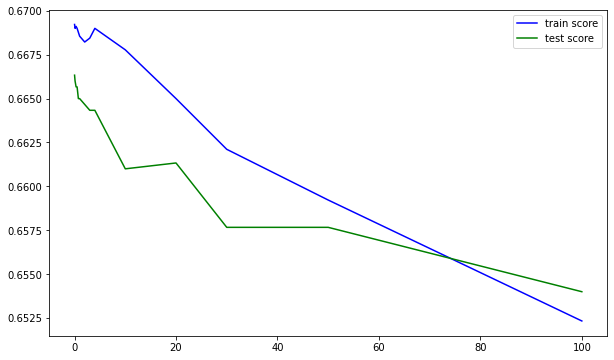

In [19]:
_=plot_scores_by_parameter(mnb_constructor,[0,0.1,0.3,0.5,0.75,1,2,3,4,10,20,30,50,100],X_train,X_valid,y_train,y_valid)

The best results are between 0 and 1. So we will try the experiment again with smaller numbers.

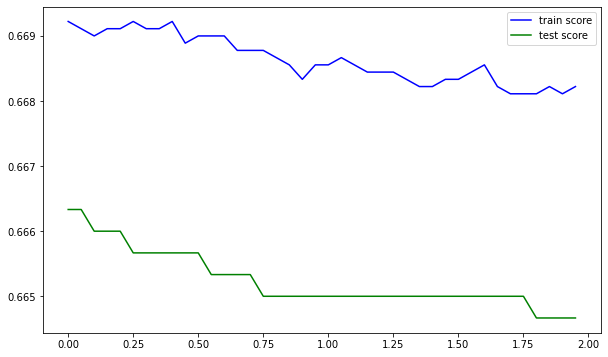

In [20]:
_=plot_scores_by_parameter(mnb_constructor,np.arange(0,2,0.05),X_train,X_valid,y_train,y_valid)

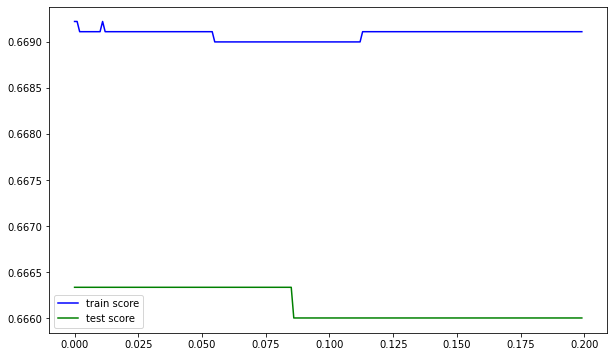

In [22]:
_=plot_scores_by_parameter(mnb_constructor,np.arange(0,0.2,0.001),X_train,X_valid,y_train,y_valid)

The best value for alpha is 0.

#### Bernoulli Naive Bayes

Now we will do the same for BernoulliNB. From the previous experiments with the parameters we now that alpha must be around 0 and binarize around 0.1.

In [25]:
bnb_by_alpha_constructor = lambda a: BernoulliNB(alpha=a,binarize=0.1)
bnb_by_binarize_constructor = lambda b: BernoulliNB(alpha=0,binarize=b)
bnb_constructor = lambda l: BernoulliNB(alpha=l[0],binarize=l[1])

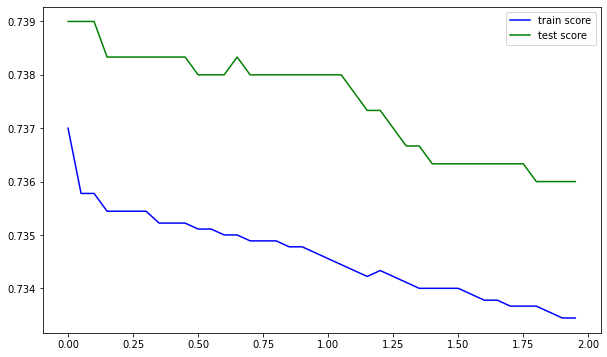

In [26]:
_=plot_scores_by_parameter(bnb_by_alpha_constructor,np.arange(0,2,0.05),X_train,X_valid,y_train,y_valid)

As we can see the best value for alpha is 0.

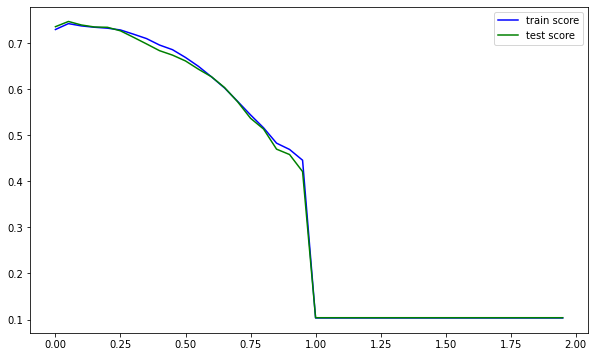

In [27]:
_=plot_scores_by_parameter(bnb_by_binarize_constructor,np.arange(0,2,0.05),X_train,X_valid,y_train,y_valid)

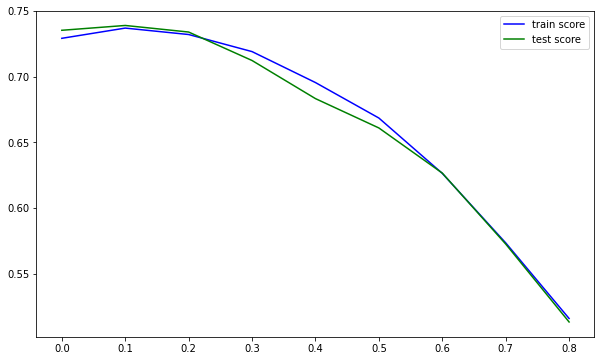

In [28]:
_=plot_scores_by_parameter(bnb_by_binarize_constructor,np.arange(0,0.9,0.1),X_train,X_valid,y_train,y_valid)

([0.7292222222222222,
  0.742,
  0.737,
  0.7341111111111112,
  0.7321111111111112,
  0.7282222222222222,
  0.7191111111111111,
  0.7095555555555556,
  0.6955555555555556,
  0.6854444444444444,
  0.6685555555555556,
  0.6492222222222223],
 [0.7353333333333333,
  0.7466666666666667,
  0.739,
  0.7346666666666667,
  0.734,
  0.7263333333333334,
  0.7123333333333334,
  0.698,
  0.6833333333333333,
  0.6736666666666666,
  0.661,
  0.643])

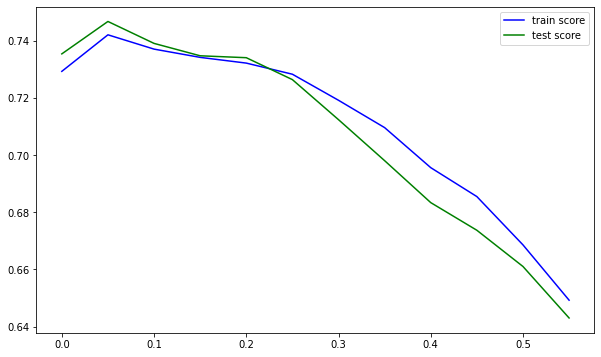

In [34]:
plot_scores_by_parameter(bnb_by_binarize_constructor,np.arange(0,0.6,0.05),X_train,X_valid,y_train,y_valid)

The best value for binarize is around 0.05.
Now we will try the model with values for alpha and binarize which are close to the already found ones.

In [37]:
values=[(0,0.05),(0,0.1),(0,0.2),(0,0.3),(0,0.4),(0,0.5),(0,0.6),(0.1,0.05),(0.1,0.1),(0.1,0.2),(0.1,0.3),(0.1,0.4),(0.1,0.5),(0.1,0.6)]
train_scores,test_scores = plot_scores_by_parameter(bnb_constructor,values,X_train,X_valid,y_train,y_valid,visualize=False)

In [38]:
for value,train_score,test_score in zip(values,train_scores,test_scores):
    print(f'alpha={value[0]} binarize={value[1]}, train score: {train_score}, test_score: {test_score}')

alpha=0 binarize=0.05, train score: 0.742, test_score: 0.7466666666666667
alpha=0 binarize=0.1, train score: 0.737, test_score: 0.739
alpha=0 binarize=0.2, train score: 0.7321111111111112, test_score: 0.734
alpha=0 binarize=0.3, train score: 0.7191111111111111, test_score: 0.7123333333333334
alpha=0 binarize=0.4, train score: 0.6955555555555556, test_score: 0.6833333333333333
alpha=0 binarize=0.5, train score: 0.6685555555555556, test_score: 0.661
alpha=0 binarize=0.6, train score: 0.6264444444444445, test_score: 0.6266666666666667
alpha=0.1 binarize=0.05, train score: 0.7413333333333333, test_score: 0.746
alpha=0.1 binarize=0.1, train score: 0.7357777777777778, test_score: 0.739
alpha=0.1 binarize=0.2, train score: 0.7293333333333333, test_score: 0.731
alpha=0.1 binarize=0.3, train score: 0.714, test_score: 0.7053333333333334
alpha=0.1 binarize=0.4, train score: 0.6868888888888889, test_score: 0.6776666666666666
alpha=0.1 binarize=0.5, train score: 0.6575555555555556, test_score: 0.64

This experiment confirms our previoues results. The best values are alpha=0, binarize=0.05

### Final tests
Let's test our tuned models on the test data.

In [45]:
bnb = BernoulliNB(alpha=0, binarize=0.05)
mnb= MultinomialNB(alpha=0.025)

bnb.fit(train_x,train_y)
mnb.fit(train_x,train_y)

bnb_pred = bnb.predict(test_x)
mnb_pred = mnb.predict(test_x)

print (f'BernoulliNB F1 score = {f1_score(test_y, bnb_pred,average="micro")*100}')
print (f'MultinomialNB F1 score = {f1_score(test_y, mnb_pred,average="micro")*100}')

print (f'BernoulliNB Classification Report \n {classification_report(test_y, bnb_pred, labels=range(0,10))}')
print (f'MultinomialNB Classification Report \n {classification_report(test_y, mnb_pred, labels=range(0,10))}')

BernoulliNB F1 score = 72.8
MultinomialNB F1 score = 65.85
BernoulliNB Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.96      0.90      0.93      1000
           2       0.54      0.65      0.59      1000
           3       0.68      0.83      0.75      1000
           4       0.50      0.51      0.50      1000
           5       0.97      0.73      0.83      1000
           6       0.41      0.20      0.26      1000
           7       0.74      0.90      0.81      1000
           8       0.89      0.89      0.89      1000
           9       0.85      0.89      0.87      1000

    accuracy                           0.73     10000
   macro avg       0.72      0.73      0.72     10000
weighted avg       0.72      0.73      0.72     10000

MultinomialNB Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      1000

BernoulliNB is the best classifier for this dataset. Let's try to improve the score with an ensemble model.

In [54]:
bnb = BernoulliNB(alpha=0, binarize=0.05)

ada_boost = AdaBoostClassifier(bnb,n_estimators=20)
gr_boost = GradientBoostingClassifier(n_estimators=20)

ada_boost.fit(train_x,train_y)
gr_boost.fit(train_x,train_y)

GradientBoostingClassifier(n_estimators=20)

In [55]:
ada_pred = ada_boost.predict(test_x)
gr_pred = gr_boost.predict(test_x)

In [56]:
print (f'Ada Boost with BernoulliNB Classification Report \n {classification_report(test_y, ada_pred, labels=range(0,10))}')
print (f'Gradient Boosting Classification Report \n {classification_report(test_y, gr_pred, labels=range(0,10))}')

Ada Boost with BernoulliNB Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.04      0.07      1000
           1       0.79      0.73      0.76      1000
           2       0.37      0.62      0.46      1000
           3       0.41      0.79      0.54      1000
           4       0.34      0.43      0.38      1000
           5       0.82      0.75      0.78      1000
           6       0.14      0.00      0.00      1000
           7       0.88      0.04      0.07      1000
           8       0.30      0.97      0.46      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.44     10000
   macro avg       0.48      0.44      0.35     10000
weighted avg       0.48      0.44      0.35     10000

Gradient Boosting Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78      1000
           1       0.99      0.90      

In [57]:
print (f'Ada Boost with BernoulliNB F1 score = {f1_score(test_y, ada_pred,average="micro")*100}')
print (f'Gradient Boosting F1 score = {f1_score(test_y, gr_pred,average="micro")*100}')

Ada Boost with BernoulliNB F1 score = 43.61
Gradient Boosting F1 score = 81.15999999999998


Ada Boost does not improve the score of the BernoulliNB.